# Proyek Analisis Data: AIR QUALITY DI AOTIZHONGXIN
- **Nama:** Valia Rismawanti
- **Email:** valiarw1300@gmail.com
- **ID Dicoding:** valia_rismawanti

## Menentukan Pertanyaan Bisnis

- Apakah ada tren penurunan atau peningkatan konsentrasi polutan dari tahun 2013 hingga 2017?
- Apakah ada pola musiman pada kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
!conda activate main-ds
!pip install streamlit babel

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

Mengumpulkan data yang akan dipakai.

In [ ]:
aotizhongxin_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [ ]:
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Data berisi kualitas udara (jumlah komponen udara disetiap waktunya) di daerah Aotizhongxin.

### Assessing Data

In [ ]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
aotizhongxin_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [ ]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Ditemukan banyak missing value teruta pada kolom PM2.5; PM10; SO2, NO2; CO; O3; TEMP; PRES; DEWP; RAIN; wd; WSPM.
- Tidak ditemukannya data yang terduplikat

### Cleaning Data

In [ ]:
aotizhongxin_df[aotizhongxin_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [ ]:
aotizhongxin_df = aotizhongxin_df.fillna({
    'PM2.5': aotizhongxin_df['PM2.5'].median(),
    'PM10': aotizhongxin_df['PM10'].median(),
    'SO2': aotizhongxin_df['SO2'].median(),
    'NO2': aotizhongxin_df['NO2'].median(),
    'CO': aotizhongxin_df['CO'].median(),
    'O3': aotizhongxin_df['O3'].median(),
    'TEMP': aotizhongxin_df['TEMP'].mean(),
    'PRES': aotizhongxin_df['PRES'].mean(),
    'DEWP': aotizhongxin_df['DEWP'].mean(),
    'RAIN': aotizhongxin_df['RAIN'].mean(),
    'WSPM': aotizhongxin_df['WSPM'].mean()
})

In [ ]:
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0])

In [ ]:
missing_data_after = aotizhongxin_df.isnull().sum()

In [ ]:
print(missing_data_after)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [ ]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [ ]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.142233,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395845,10.401079,13.684991,0.909796,1.203831
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Pada kolom yang terdapat banyak missing value kita gunakan metode imputation, karena banyaknya file yang tidak lengkap. untuk pengganti nilai disesuaikan dengan tipe data tiap kolomnya.
- Variabel missing_data digunakan untuk mengecek apakah masih ada data yang hilang.

## Exploratory Data Analysis (EDA)

Pada tahap ini kita akan mengidentifikasi pola, menemukan anomali, memeriksa asumsi dari kualitas udara di Aotizhongxin, Beijing.

### Explore ...

In [ ]:
aotizhongxin_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.142233,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [ ]:
def get_rainy_or_summer(month):
    if month in [6, 7, 8]:
        return 'Musim Panas'
    elif month in [3, 4, 5]:
        return 'Musim Semi'
    elif month in [12, 1, 2]:
        return 'Musim Dingin'
    else:
        return 'Musim Gugur'

In [ ]:
aotizhongxin_df['Season'] = aotizhongxin_df['month'].apply(get_rainy_or_summer)

seasonal_pollutants dibuat untuk mengetahui rata-rata komponen udara yang mempengaruhi tiap musimnya.

In [ ]:
seasonal_pollutants = aotizhongxin_df.groupby('Season')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

In [ ]:
print(seasonal_pollutants)

                  PM2.5        PM10        SO2        NO2           CO  \
Season                                                                   
Musim Dingin  94.477620  115.423084  30.114631  64.242716  1837.696214   
Musim Gugur   86.242434  110.012603  11.186896  68.649006  1302.781136   
Musim Panas   67.370131   81.369010   6.217679  48.758562   848.065104   
Musim Semi    80.669984  131.663655  21.272726  55.038116  1001.620358   

                     O3  
Season                   
Musim Dingin  30.936752  
Musim Gugur   33.295179  
Musim Panas   91.090594  
Musim Semi    66.563169  


**Insight:**
- Membuat fungsi get_rainy_or_summer yang mana berguna untuk memecah atau membagi nilai rata-rata tiap musimnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada tren penurunan atau peningkatan konsentrasi polutan dari tahun 2013 hingga 2017?

In [ ]:
data_filtered = aotizhongxin_df[aotizhongxin_df['year'].between(2013, 2017)]

annual_pollutants dibuat untuk mengetahui rata-rata komponen udara per tahunnya.

In [ ]:
annual_pollutants = aotizhongxin_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()
print(annual_pollutants)

   year      PM2.5        PM10        SO2        NO2           CO         O3
0  2013  82.355937  112.897467  23.377838  63.348157  1144.828159  49.117162
1  2014  88.905422  120.107911  20.549600  63.300103  1170.308219  48.963619
2  2015  81.523721  111.772135  14.304658  60.852409  1388.812785  63.330708
3  2016  73.779827   94.551343  10.831626  48.565801  1191.199909  61.458561
4  2017  94.346751  107.113701  20.679379  66.131356  1659.816384  47.340395


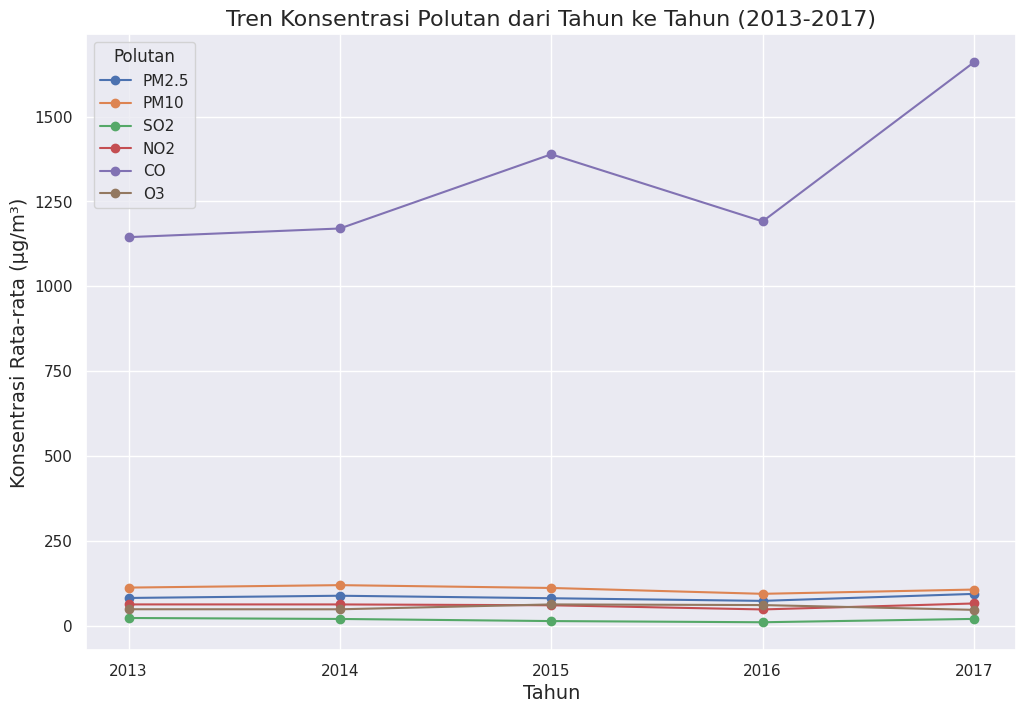

In [ ]:
plt.figure(figsize=(12, 8))
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.plot(annual_pollutants['year'], annual_pollutants[pollutant], marker='o', label=pollutant)

plt.title('Tren Konsentrasi Polutan dari Tahun ke Tahun (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Konsentrasi Rata-rata (µg/m³)', fontsize=14)
plt.xticks(annual_pollutants['year'])
plt.legend(title='Polutan')
plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah ada pola musiman pada kualitas udara?

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

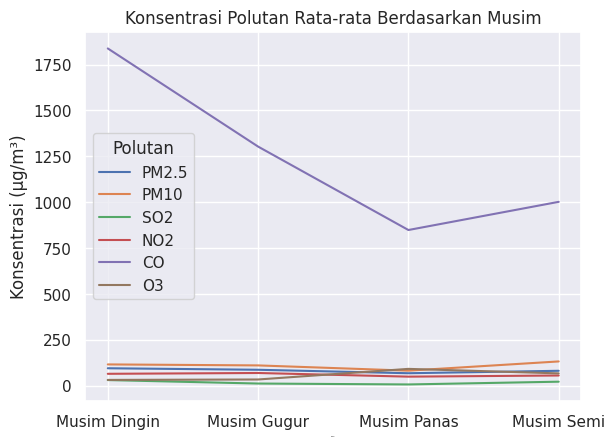

In [ ]:
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.plot(seasonal_pollutants.index, seasonal_pollutants[pollutant], label=pollutant)

plt.title('Konsentrasi Polutan Rata-rata Berdasarkan Musim')
plt.xlabel('Musim', fontsize=1)
plt.ylabel('Konsentrasi (μg/m³)')
plt.legend(title='Polutan')
plt.grid(True)

plt.show()

**Insight:**
- Pada grafik pertama menggambarkan seberapa tingkat penurunan/peningkatan konsentrasi polutan pertahun.
- Pada grafik kedua menggambarkan pola konsentrasi polutan permusim.

## Analisis Lanjutan (Opsional)

## Conclusion

- Konsentrasi polutan pada CO mengalami tren penurunan pada tahun 2016, dan mengalami peningkatan pada tahun 2015 dan 2017.
untuk PM10 dan PM2.5 cenderung stagnan, namun pada tahun 2016 penurunan dan naik kembali pada tahun 2017.
untuk SO2 dan NO2 dari tahun 2013-2017 tidak terjadi tren penurunan  ataupun penaikan.
untuk O3 pada tahun 2015 mengalami kenaikan
dan mengalami penurunan pada tahun 2017.

- Pola kualitas udara setiap musimnya mengalami perbedaan, seperti pada musim dingin hingga musim panas konsentrasi polutan  CO mengalami penurunan sedangkan kembali naik pada musim semi. Atau semakin panas kualitas udara CO menurun.
Sedangkan untuk polutan PM10 kualitas udaranya cenderung sama dari musim dingin ke musim panas dan memiliki kenaikan dari musim panas ke musim semi.
NO2, SO2 dan PM2.5 setiap musimnya tidak mengalami perubahan/ artinya pergantian musim tidak mempengaruhi konsentrasi polutan.
Untuk polutan O3 dari musim dingin sampai kemuim semi mengalami kenaikan.

dari kesimpulan diatas untuk pengambilan kebijakan terkait kualitas udara maka:
1. Pengendalian Polusi Karbon Monoksida (CO)
- Pastikan kebijakan pengendalian CO lebih ketat untuk mencegah kenaikan lebih lanjut.
- Fokus pada Sumber Utama Emisi: Analisis lebih lanjut diperlukan untuk mengidentifikasi sumber utama CO pada tahun 2015 dan 2017. Misalnya, transportasi atau industri.
- Implementasi Teknologi Hijau: Berikan insentif kepada industri dan transportasi untuk beralih ke teknologi rendah emisi (misalnya kendaraan listrik atau penggunaan bahan bakar yang lebih ramah lingkungan).
2. Penanganan PM10 dan PM2.5
- Peningkatan pengawasan secara berkelanjutan terhadap polutan ini, terutama pada tahun 2017 di mana terjadi kenaikan kembali.
- Pengurangan Sumber Debu Industri dan Transportasi: Perkuat regulasi untuk pengendalian emisi dari industri yang mengeluarkan partikel PM10 dan PM2.5 Kebijakan transportasi ramah lingkungan perlu lebih diintensifkan.
- Intervensi di Area yang Rentan: Fokus pada daerah-daerah yang lebih rentan terhadap polusi partikel untuk penerapan kebijakan yang lebih ketat, seperti zona rendah emisi (Low Emission Zones).
3. Manajemen Emisi SO2 dan NO2
- Status Quo Perlu Diatasi: Meskipun konsentrasi SO2 dan NO2 tidak mengalami peningkatan, kebijakan pengendalian tetap harus dioptimalkan. Ini berarti bahwa program pengurangan emisi harus terus ditingkatkan agar polutan ini menurun.
- Kebijakan untuk Pabrik dan Pembangkit Listrik: Pastikan bahwa pembangkit listrik dan pabrik yang menggunakan bahan bakar fosil mematuhi standar emisi yang lebih ketat, dan teknologi scrubber untuk mengurangi emisi SO2 dan NO2 lebih sering digunakan.
4. Penanganan Ozon (O3)
- Pemantauan dan Analisis Musim: Ozon cenderung lebih tinggi pada bulan-bulan musim panas. Oleh karena itu, perlu dilakukan pemantauan yang lebih intensif selama periode ini dan di daerah urban yang rawan.
- Pengendalian Sumber NOx dan VOC: Karena ozon terbentuk dari reaksi fotokimia NOx dan VOC (Volatile Organic Compounds), pengendalian pada emisi kedua senyawa ini harus lebih diprioritaskan.
- Kampanye Publik: Sosialisasikan dampak polusi ozon terhadap kesehatan, terutama pada populasi yang rentan seperti anak-anak, lansia, dan orang dengan gangguan pernapasan.
5. Perencanaan Jangka Panjang untuk Pengendalian Kualitas Udara
- Rencana Pengendalian Jangka Panjang: Buat rencana pengendalian kualitas udara jangka panjang yang berfokus pada pengurangan bertahap terhadap seluruh polutan.
- Integrasi Teknologi Monitoring: Gunakan teknologi sensor pintar dan IoT untuk pemantauan kualitas udara secara real-time dan memberikan peringatan dini terhadap lonjakan polusi.
- Penggunaan Sumber Energi Terbarukan: Untuk mengurangi emisi dari pembakaran bahan bakar fosil yang menjadi sumber utama beberapa polutan (SO2, NO2, CO), dorong peralihan ke energi terbarukan seperti angin, matahari, dan bioenergi.


In [ ]:
aotizhongxin_df.to_csv("Aotizhongxin.csv", index=False)